# Simulando a geração de K pontos em um circulo de raio R com Simulação de Monte Carlo

Nesse notebook, estará toda a ánalise de dados referênte a simulação de Monte Carlos utilizada para validar dois modelos analíticos referentes a probabilidade da distribuição de pontos aleátórios k com distãncia variadas do centro de uma circuferência de raio R de forma a garantir a uniformidade na sua distribuição espacial (caso 1) e na sua distância para o centro da circunferência (caso 2).

Os parâmtros escolhidos para essa simulação foram:
* k: Número de pontos a serem distribuidos
* r: valores dos expoentes das pontências de base que definiram a quantidade de rodadas de simulação
* R: raio da circunferência
* t: forma como o pontos deveriam ser distribuidos
* seed: semente utilizada para reprodubilidade dos cenários

Para os experimentos, estes foram os valores escolhidos para cada parâmetro
* k: 30
* r: \[1,2,3,4,5,6\]
* R: 0.75
* t: \[(cenário 1), 1(cenário 2)\]
* seed: 42

## Preparando o Ambiente

In [20]:
!pip install pandas
!pip install numpy
!pip install matplotlib

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating constants
K=40
R=6
RADIUS=0.75
SEED=42

POINST_FILENAME_SCENARIO_0 = f"monte-carlo-simulation-points-0_{SEED}_{K}_{R}_{RADIUS:.6f}.csv"
RESULTS_FILENAME_SCENARIO_0 = f"monte-carlo-simulation-results-0_{SEED}_{K}_{R}_{RADIUS:.6f}.csv"
POINST_FILENAME_SCENARIO_1 = f"monte-carlo-simulation-points-1_{SEED}_{K}_{R}_{RADIUS:.6f}.csv"
RESULTS_FILENAME_SCENARIO_1 = f"monte-carlo-simulation-results-1_{SEED}_{K}_{R}_{RADIUS:.6f}.csv"

In [3]:
results_s0_df = pd.read_csv('./../'+RESULTS_FILENAME_SCENARIO_0)
points_s0_df = pd.read_csv('./../'+POINST_FILENAME_SCENARIO_0)
results_s1_df = pd.read_csv('./../'+RESULTS_FILENAME_SCENARIO_1)
points_s1_df = pd.read_csv('./../'+POINST_FILENAME_SCENARIO_1)

In [4]:
def getExperimentSample(df:pd.DataFrame, r:int) -> pd.DataFrame:
    filtered_df = df[df['number-of-runs(r)'] == r]
    sampled_df = filtered_df.sample(n=filtered_df['number-of-points(k)'].iloc[0], random_state=1)
    
    return sampled_df

def getExperimentResults(df:pd.DataFrame, r:int) -> pd.DataFrame:
    filtered_df = df[df['number-of-runs(r)'] == r]
    
    return filtered_df

# PDF Modelos Analítico

def UniformPointsLocationPDF(x:np.ndarray, radius:float) -> np.ndarray:
    return (2 * x)/(radius ** 2)

def UniformPointsDistancePDF(x:np.ndarray, radius:float) -> np.ndarray:
    return np.ones(len(x))/ radius
    
# CDF Modelos Analítico
def UniformPointsLocationCDF(x:np.ndarray, radius:float) -> float:
    return x**2/radius**2

def UniformPointsDistanceCDF(x:np.ndarray, radius:float) -> float:
    return x/radius

# Média Modelos Analítico

def UniformPointsLocationMean(radius:float) -> float:
    return (2*radius)/3

def UniformPointsDistanceMean(radius:float) -> float:
    return radius/2
    
# Desvio Padrão Modelos Analítico

def UniformPointsLocationStdDeviation(radius:float) -> float:
    return ((radius**2)/18) ** 0.5

def UniformPointsDistanceStdDeviation(radius:float) -> float:
    return ((radius**2)/12) ** 0.5

## Comparação das Distâncias Geradas com Monte Carlo e Encontradas com o Modelo Analítico

### Analítico

#### Cenário 1

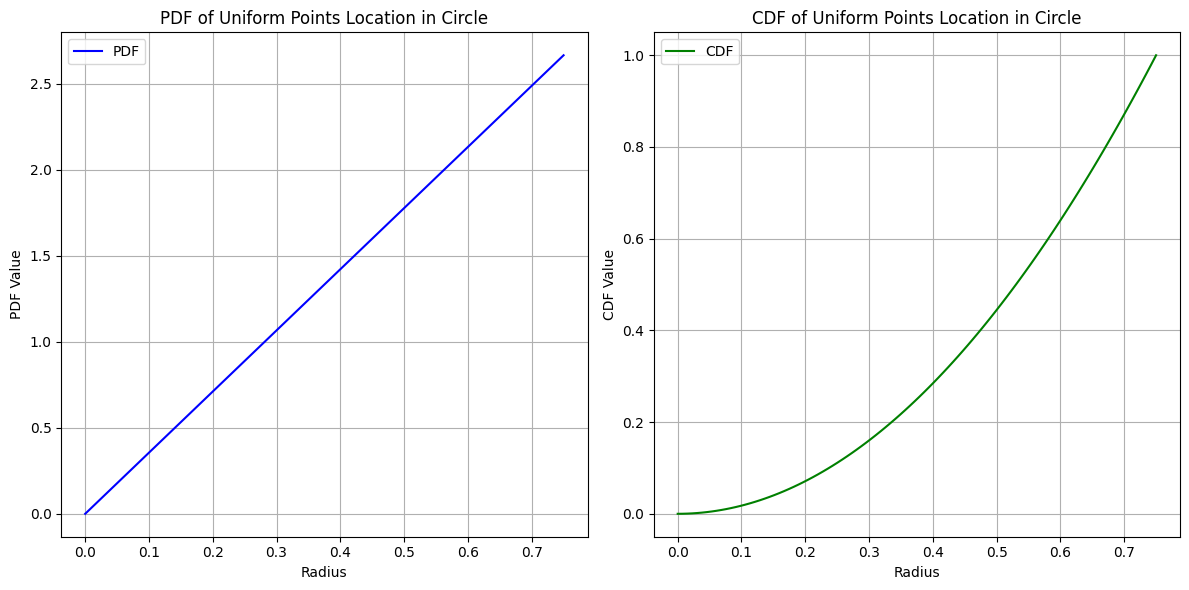

In [5]:
radius2_values = np.linspace(0, RADIUS, 100)
pdf2_values = UniformPointsLocationPDF(radius2_values, RADIUS)
cdf2_values = UniformPointsLocationCDF(radius2_values, RADIUS)

# Create plots
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(radius2_values, pdf2_values, label='PDF', color='blue')
plt.title('PDF of Uniform Points Location in Circle')
plt.xlabel('Radius')
plt.ylabel('PDF Value')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(radius2_values, cdf2_values, label='CDF', color='green')
plt.title('CDF of Uniform Points Location in Circle')
plt.xlabel('Radius')
plt.ylabel('CDF Value')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

#### Cenário 2

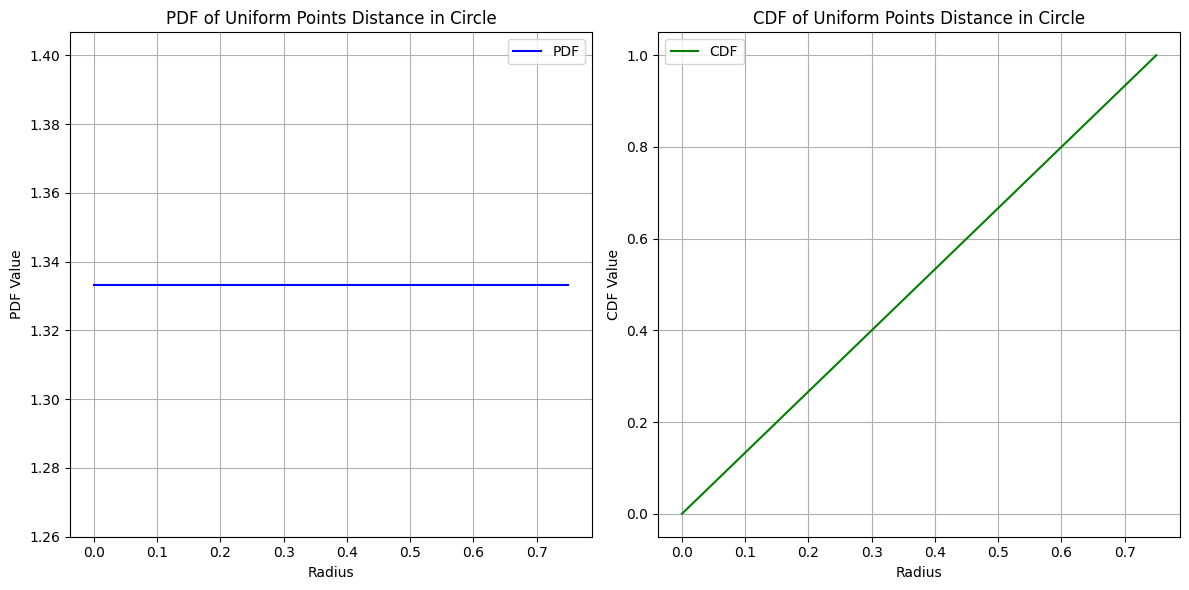

In [6]:
radius2_values = np.linspace(0, RADIUS, 100)
pdf2_values = UniformPointsDistancePDF(radius2_values, RADIUS)
cdf2_values = UniformPointsDistanceCDF(radius2_values, RADIUS)

# Create plots
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(radius2_values, pdf2_values, label='PDF', color='blue')
plt.title('PDF of Uniform Points Distance in Circle')
plt.xlabel('Radius')
plt.ylabel('PDF Value')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(radius2_values, cdf2_values, label='CDF', color='green')
plt.title('CDF of Uniform Points Distance in Circle')
plt.xlabel('Radius')
plt.ylabel('CDF Value')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

### Monte Carlo

#### Cenário 1

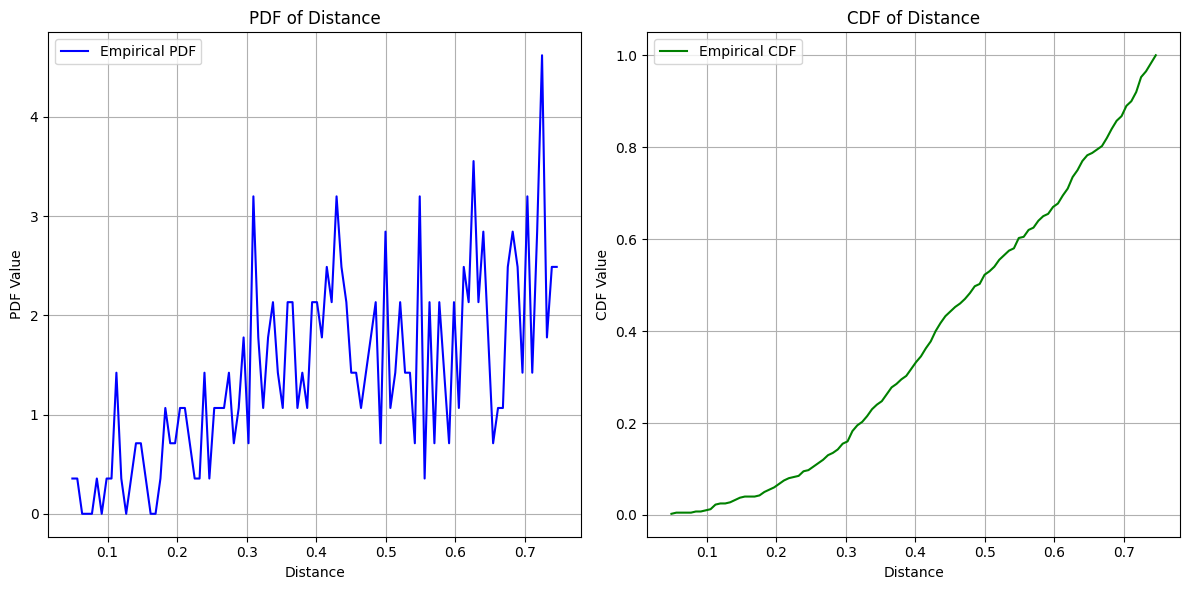

In [7]:
filtered_df = points_s0_df[points_s0_df['number-of-runs(r)'] == 1]

distances = filtered_df['distance']

num_bins = 100
hist, bins = np.histogram(distances, bins=num_bins, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate CDF
cdf = np.cumsum(hist * np.diff(bins))

# Create plots with the same style as the analytical model
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(bin_centers, hist, label='Empirical PDF', color='blue')
plt.title('PDF of Distance')
plt.xlabel('Distance')
plt.ylabel('PDF Value')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(bin_centers, cdf, label='Empirical CDF', color='green')
plt.title('CDF of Distance')
plt.xlabel('Distance')
plt.ylabel('CDF Value')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

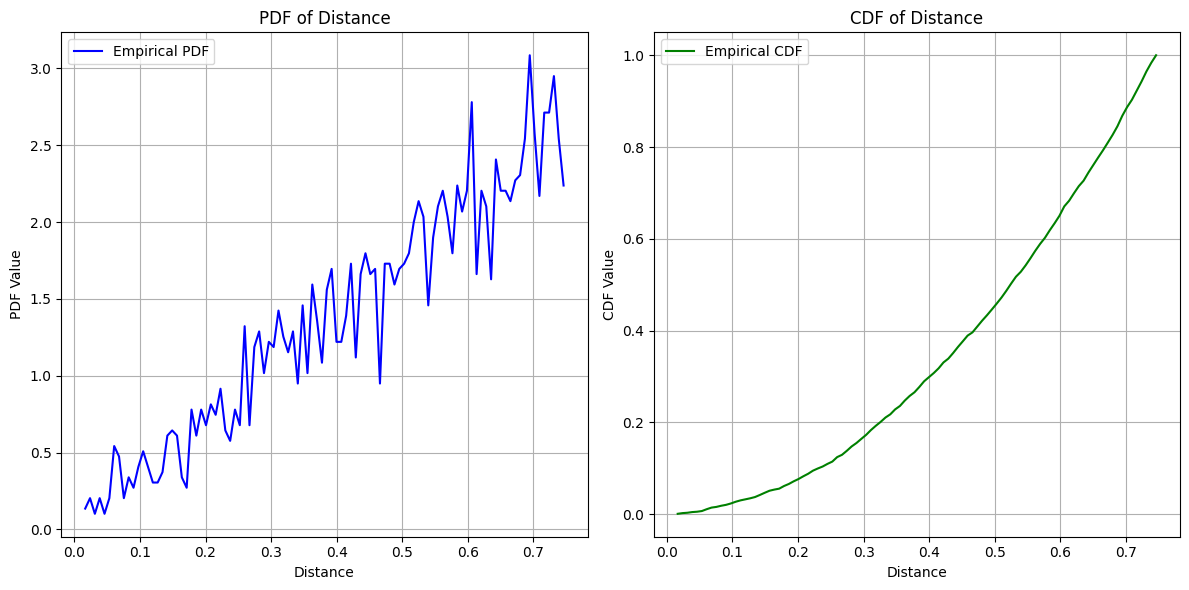

In [8]:
filtered_df = points_s0_df[points_s0_df['number-of-runs(r)'] == 2]

distances = filtered_df['distance']

num_bins = 100
hist, bins = np.histogram(distances, bins=num_bins, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate CDF
cdf = np.cumsum(hist * np.diff(bins))

# Create plots with the same style as the analytical model
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(bin_centers, hist, label='Empirical PDF', color='blue')
plt.title('PDF of Distance')
plt.xlabel('Distance')
plt.ylabel('PDF Value')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(bin_centers, cdf, label='Empirical CDF', color='green')
plt.title('CDF of Distance')
plt.xlabel('Distance')
plt.ylabel('CDF Value')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

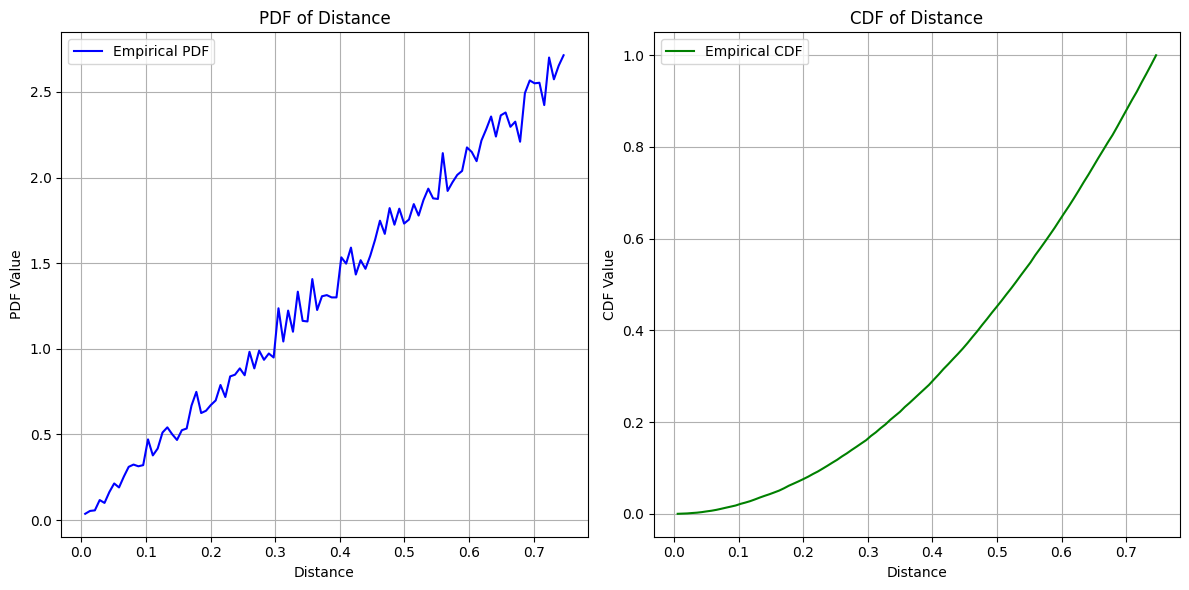

In [9]:
filtered_df = points_s0_df[points_s0_df['number-of-runs(r)'] == 3]

distances = filtered_df['distance']

num_bins = 100
hist, bins = np.histogram(distances, bins=num_bins, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate CDF
cdf = np.cumsum(hist * np.diff(bins))

# Create plots with the same style as the analytical model
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(bin_centers, hist, label='Empirical PDF', color='blue')
plt.title('PDF of Distance')
plt.xlabel('Distance')
plt.ylabel('PDF Value')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(bin_centers, cdf, label='Empirical CDF', color='green')
plt.title('CDF of Distance')
plt.xlabel('Distance')
plt.ylabel('CDF Value')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

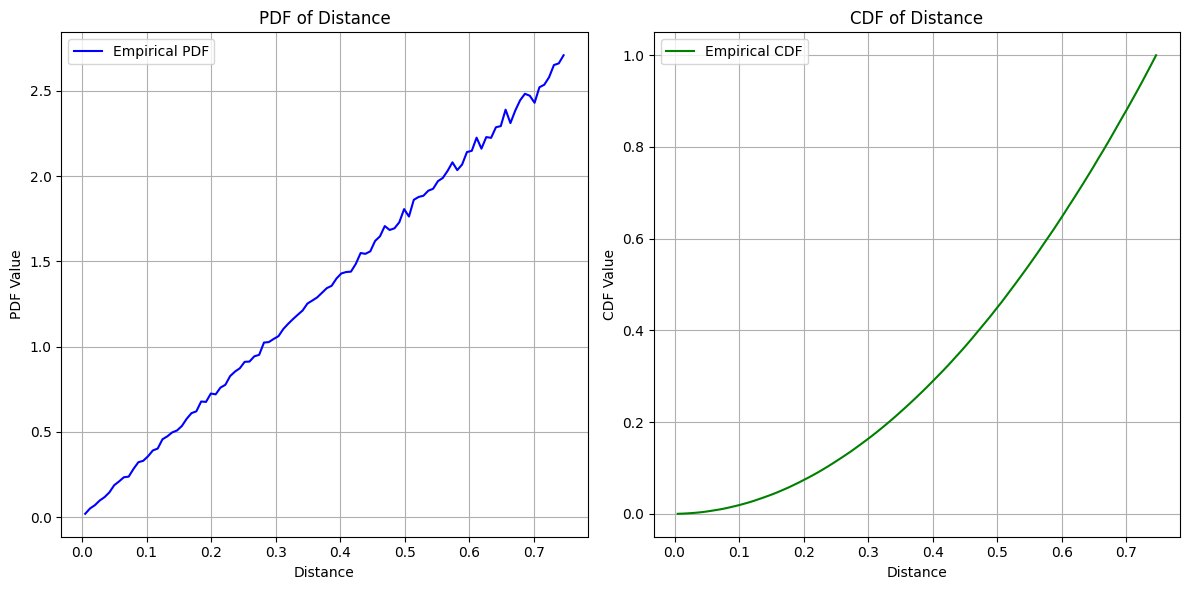

In [10]:
filtered_df = points_s0_df[points_s0_df['number-of-runs(r)'] == 4]

distances = filtered_df['distance']

num_bins = 100
hist, bins = np.histogram(distances, bins=num_bins, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate CDF
cdf = np.cumsum(hist * np.diff(bins))

# Create plots with the same style as the analytical model
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(bin_centers, hist, label='Empirical PDF', color='blue')
plt.title('PDF of Distance')
plt.xlabel('Distance')
plt.ylabel('PDF Value')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(bin_centers, cdf, label='Empirical CDF', color='green')
plt.title('CDF of Distance')
plt.xlabel('Distance')
plt.ylabel('CDF Value')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

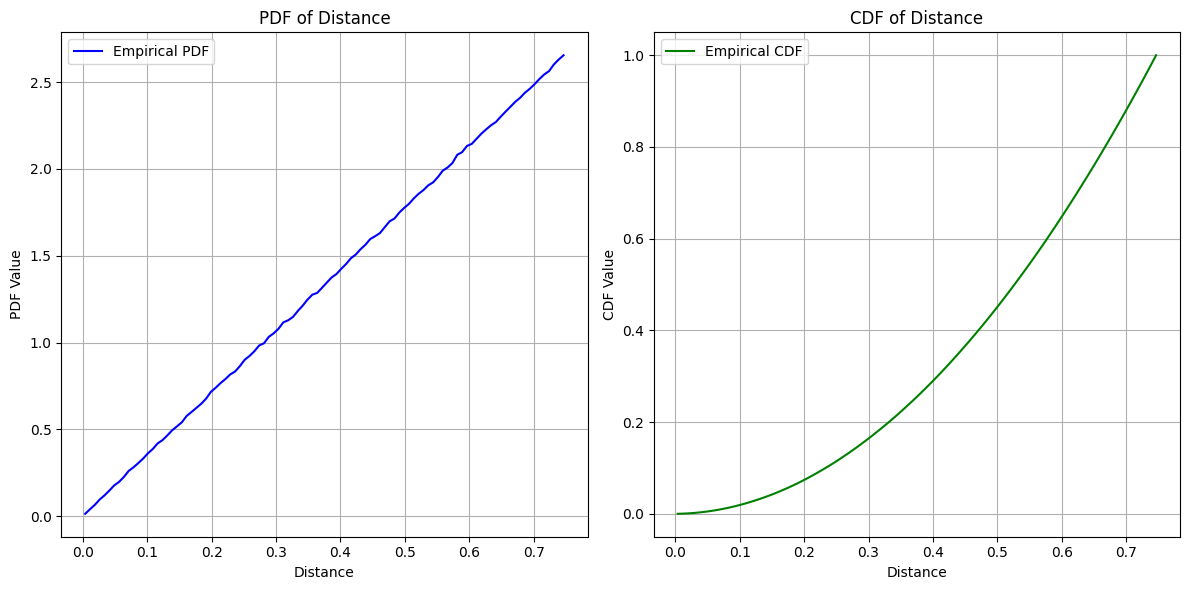

In [11]:
filtered_df = points_s0_df[points_s0_df['number-of-runs(r)'] == 5]

distances = filtered_df['distance']

num_bins = 100
hist, bins = np.histogram(distances, bins=num_bins, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate CDF
cdf = np.cumsum(hist * np.diff(bins))

# Create plots with the same style as the analytical model
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(bin_centers, hist, label='Empirical PDF', color='blue')
plt.title('PDF of Distance')
plt.xlabel('Distance')
plt.ylabel('PDF Value')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(bin_centers, cdf, label='Empirical CDF', color='green')
plt.title('CDF of Distance')
plt.xlabel('Distance')
plt.ylabel('CDF Value')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

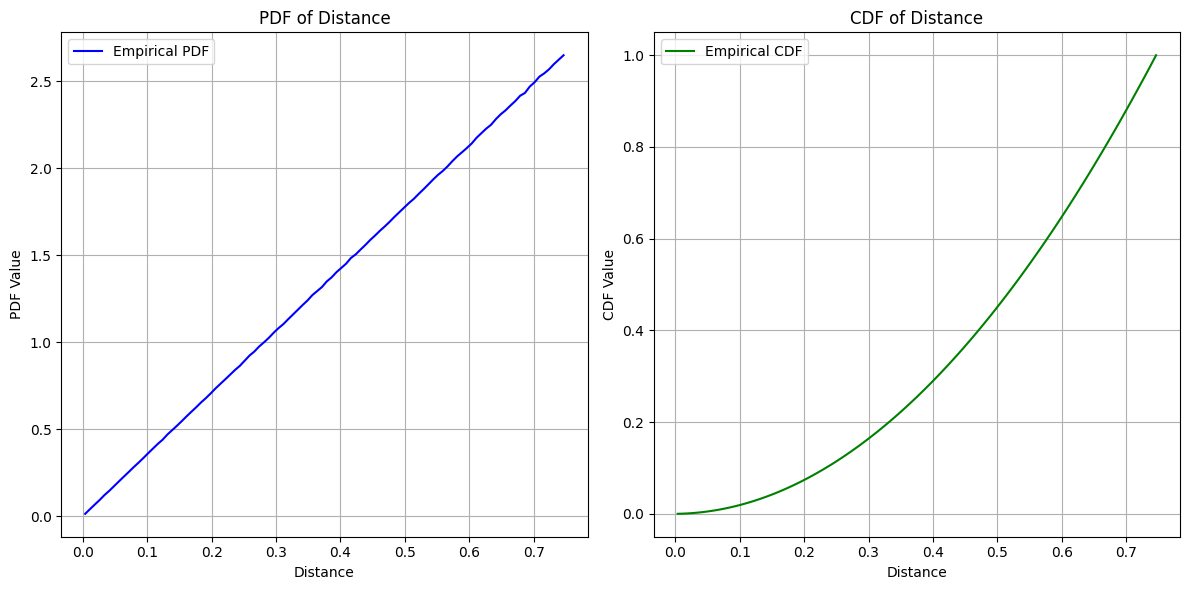

In [12]:
filtered_df = points_s0_df[points_s0_df['number-of-runs(r)'] == 6]

distances = filtered_df['distance']

num_bins = 100
hist, bins = np.histogram(distances, bins=num_bins, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate CDF
cdf = np.cumsum(hist * np.diff(bins))

# Create plots with the same style as the analytical model
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(bin_centers, hist, label='Empirical PDF', color='blue')
plt.title('PDF of Distance')
plt.xlabel('Distance')
plt.ylabel('PDF Value')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(bin_centers, cdf, label='Empirical CDF', color='green')
plt.title('CDF of Distance')
plt.xlabel('Distance')
plt.ylabel('CDF Value')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

#### Cenário 2

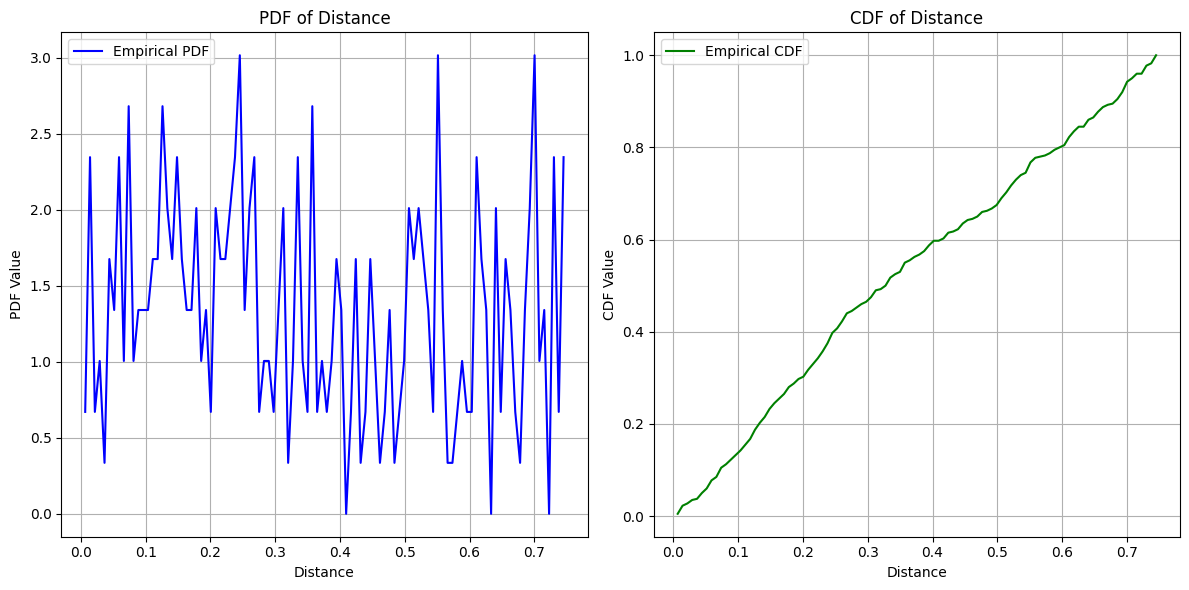

In [13]:
filtered_df = points_s1_df[points_s1_df['number-of-runs(r)'] == 1]

distances = filtered_df['distance']

num_bins = 100
hist, bins = np.histogram(distances, bins=num_bins, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate CDF
cdf = np.cumsum(hist * np.diff(bins))

# Create plots with the same style as the analytical model
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(bin_centers, hist, label='Empirical PDF', color='blue')
plt.title('PDF of Distance')
plt.xlabel('Distance')
plt.ylabel('PDF Value')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(bin_centers, cdf, label='Empirical CDF', color='green')
plt.title('CDF of Distance')
plt.xlabel('Distance')
plt.ylabel('CDF Value')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

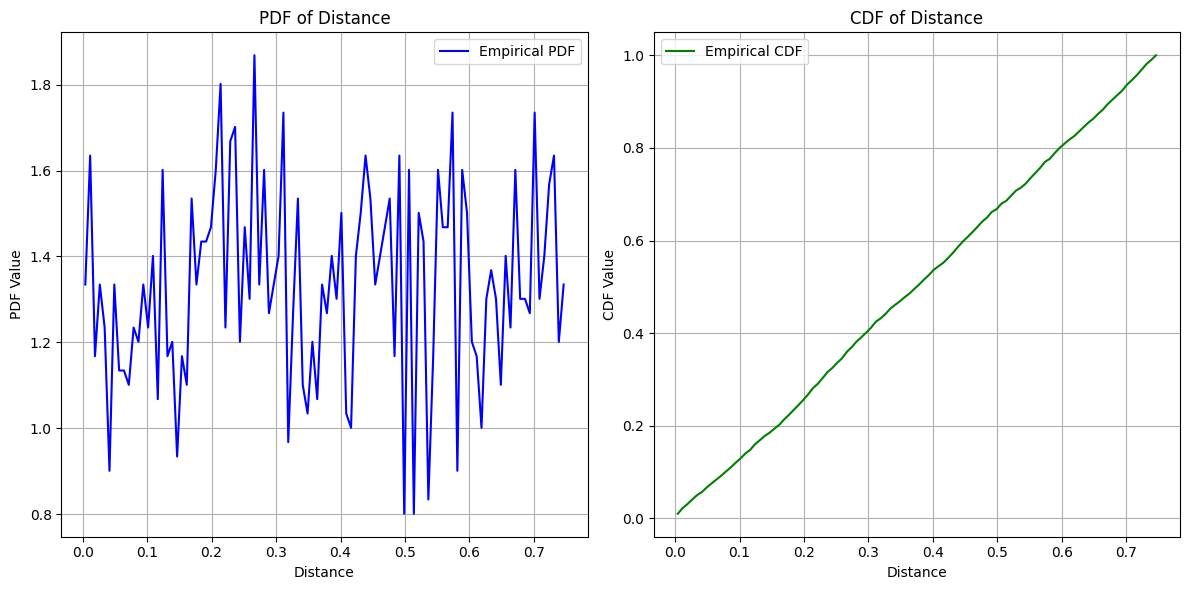

In [14]:
filtered_df = points_s1_df[points_s1_df['number-of-runs(r)'] == 2]

distances = filtered_df['distance']

num_bins = 100
hist, bins = np.histogram(distances, bins=num_bins, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate CDF
cdf = np.cumsum(hist * np.diff(bins))

# Create plots with the same style as the analytical model
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(bin_centers, hist, label='Empirical PDF', color='blue')
plt.title('PDF of Distance')
plt.xlabel('Distance')
plt.ylabel('PDF Value')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(bin_centers, cdf, label='Empirical CDF', color='green')
plt.title('CDF of Distance')
plt.xlabel('Distance')
plt.ylabel('CDF Value')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

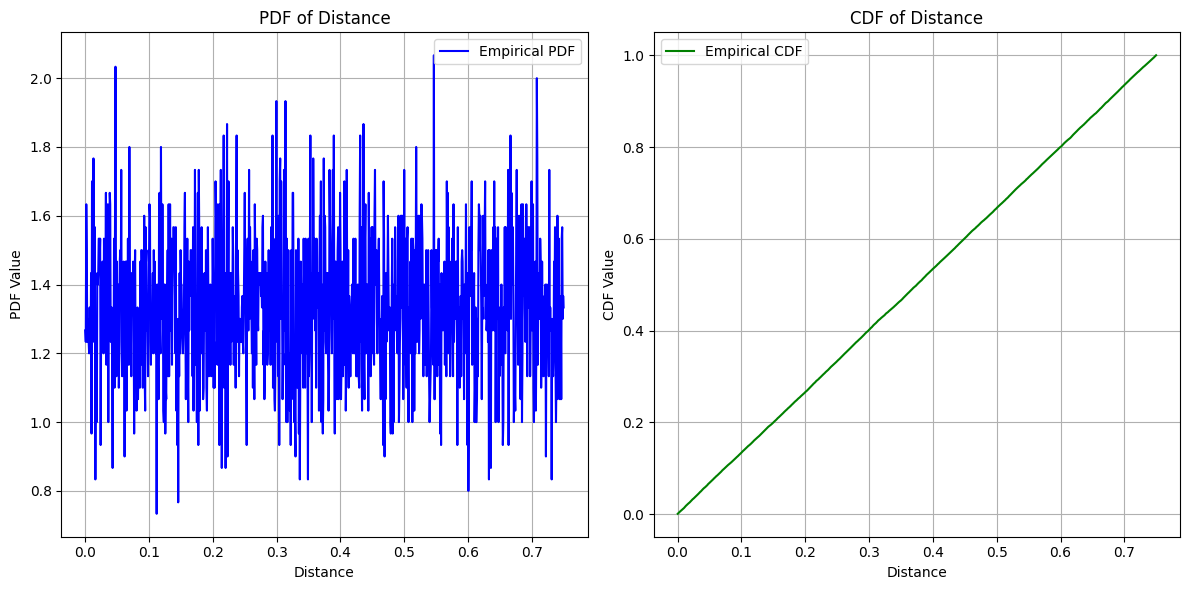

In [15]:
filtered_df = points_s1_df[points_s1_df['number-of-runs(r)'] == 3]

distances = filtered_df['distance']

num_bins = 1000
hist, bins = np.histogram(distances, bins=num_bins, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate CDF
cdf = np.cumsum(hist * np.diff(bins))

# Create plots with the same style as the analytical model
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(bin_centers, hist, label='Empirical PDF', color='blue')
plt.title('PDF of Distance')
plt.xlabel('Distance')
plt.ylabel('PDF Value')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(bin_centers, cdf, label='Empirical CDF', color='green')
plt.title('CDF of Distance')
plt.xlabel('Distance')
plt.ylabel('CDF Value')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

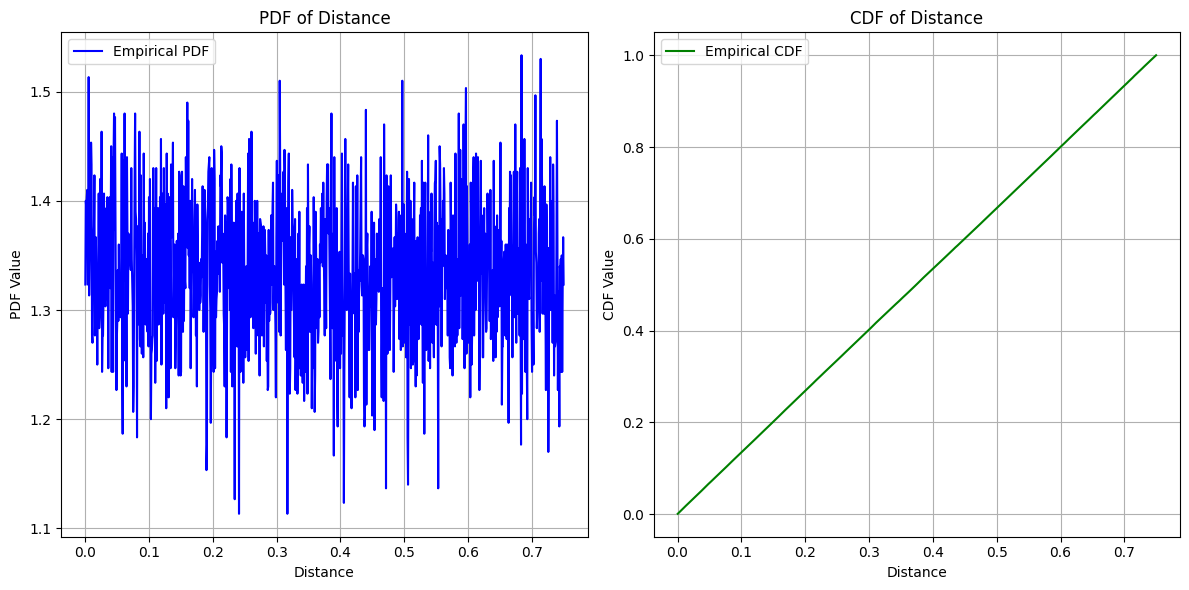

In [16]:
filtered_df = points_s1_df[points_s1_df['number-of-runs(r)'] == 4]

distances = filtered_df['distance']

num_bins = 1000
hist, bins = np.histogram(distances, bins=num_bins, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate CDF
cdf = np.cumsum(hist * np.diff(bins))

# Create plots with the same style as the analytical model
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(bin_centers, hist, label='Empirical PDF', color='blue')
plt.title('PDF of Distance')
plt.xlabel('Distance')
plt.ylabel('PDF Value')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(bin_centers, cdf, label='Empirical CDF', color='green')
plt.title('CDF of Distance')
plt.xlabel('Distance')
plt.ylabel('CDF Value')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


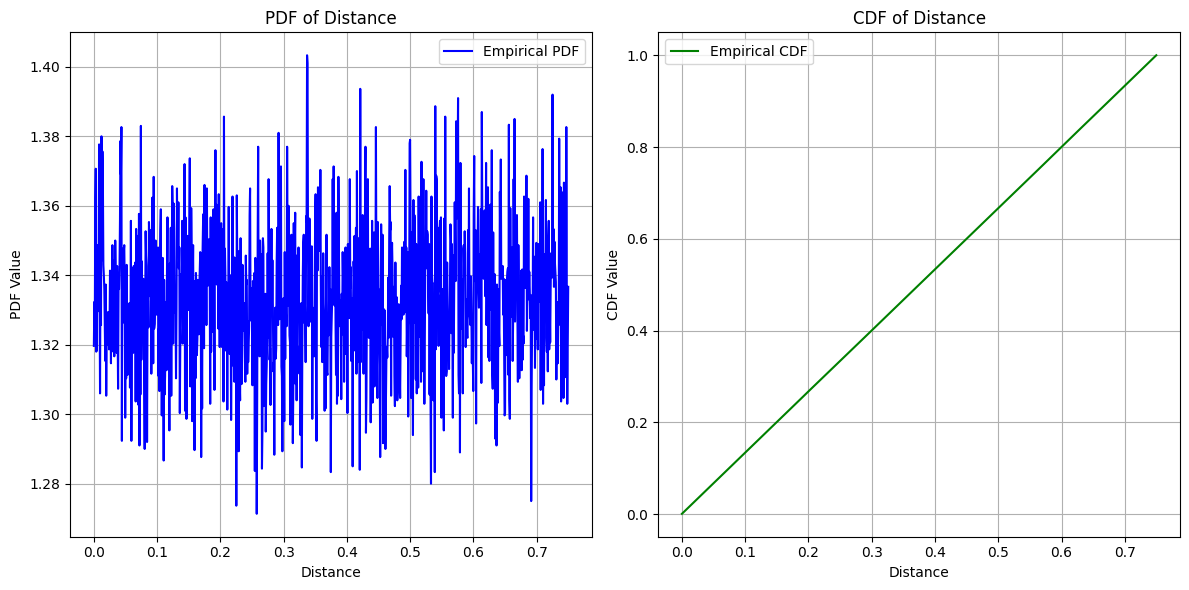

In [17]:
filtered_df = points_s1_df[points_s1_df['number-of-runs(r)'] == 5]

distances = filtered_df['distance']

num_bins = 1000
hist, bins = np.histogram(distances, bins=num_bins, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate CDF
cdf = np.cumsum(hist * np.diff(bins))

# Create plots with the same style as the analytical model
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(bin_centers, hist, label='Empirical PDF', color='blue')
plt.title('PDF of Distance')
plt.xlabel('Distance')
plt.ylabel('PDF Value')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(bin_centers, cdf, label='Empirical CDF', color='green')
plt.title('CDF of Distance')
plt.xlabel('Distance')
plt.ylabel('CDF Value')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

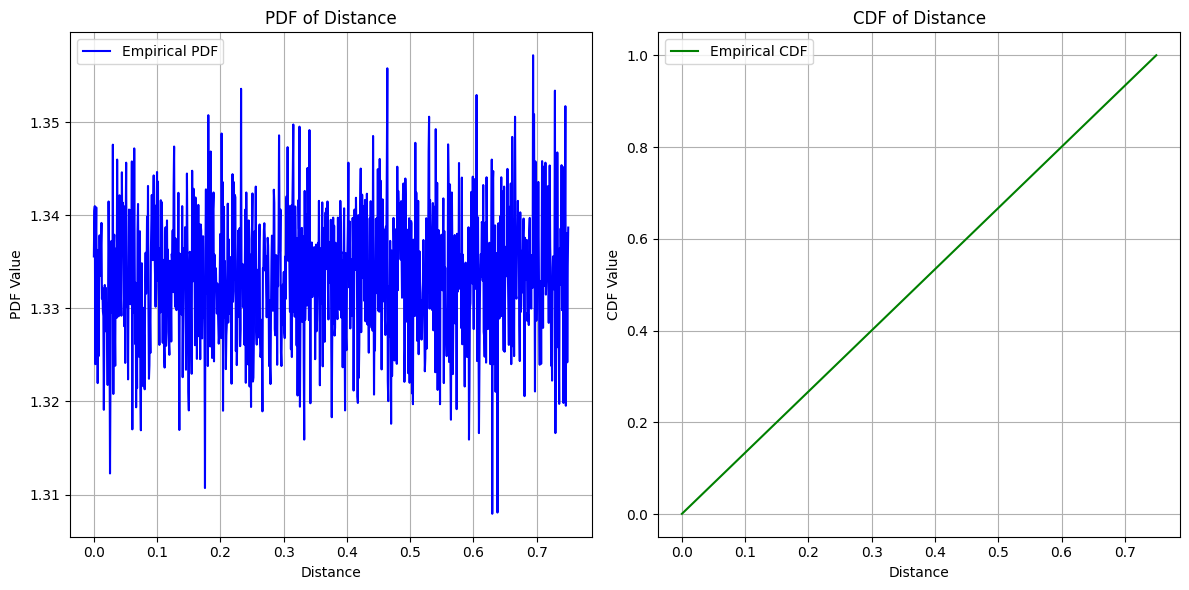

In [18]:
filtered_df = points_s1_df[points_s1_df['number-of-runs(r)'] == 6]

distances = filtered_df['distance']

num_bins = 1000
hist, bins = np.histogram(distances, bins=num_bins, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate CDF
cdf = np.cumsum(hist * np.diff(bins))

# Create plots with the same style as the analytical model
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(bin_centers, hist, label='Empirical PDF', color='blue')
plt.title('PDF of Distance')
plt.xlabel('Distance')
plt.ylabel('PDF Value')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(bin_centers, cdf, label='Empirical CDF', color='green')
plt.title('CDF of Distance')
plt.xlabel('Distance')
plt.ylabel('CDF Value')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

## Plot dos Pontos Gerados com Monte Carlo

#### Cenário 1

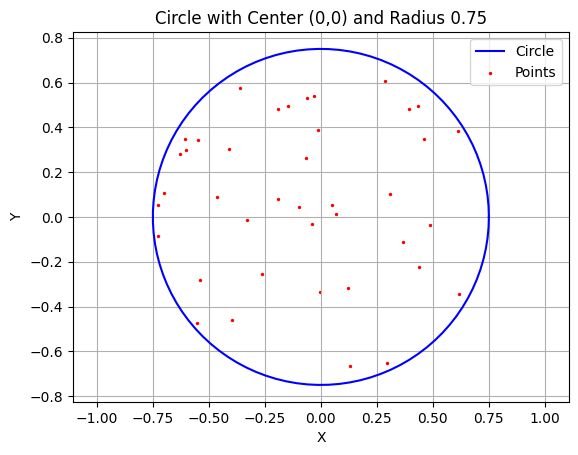

In [19]:
# Assuming you have already read the CSV file and stored it in points_df

points_df = getExperimentSample(points_s0_df, R)

# Extract radius from DataFrame
radius = points_df['radius'].iloc[0]

# Create data points to plot the circle
theta = np.linspace(0, 2*np.pi, 100)
x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the circle with center (0,0)
ax.plot(x_circle, y_circle, label='Circle', color='b')

# Plot the points (optional)
ax.scatter(points_df['x'], points_df['y'], color='r', label='Points', s=2)

# Set plot limits based on the maximum absolute value of x and y coordinates
max_range = max(np.abs(points_df[['x', 'y']].values).max(), radius)
ax.set_xlim(-max_range, max_range)
ax.set_ylim(-max_range, max_range)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Circle with Center (0,0) and Radius {}'.format(radius))

# Add legend (optional)
ax.legend()

# Show the plot
plt.grid(True)
plt.axis('equal')  # Equal aspect ratio ensures the circle is circular
plt.show()

#### Cenário 2

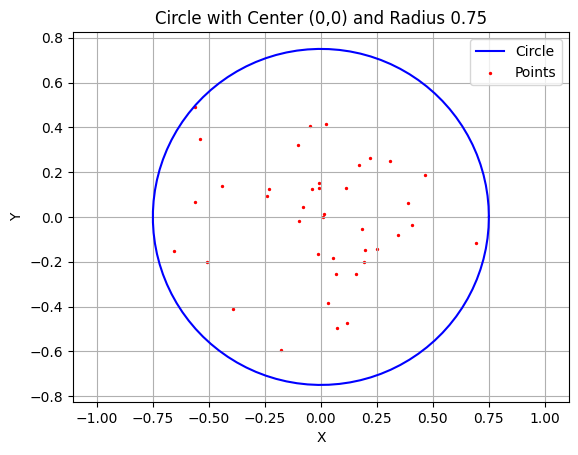

In [20]:
# Assuming you have already read the CSV file and stored it in points_df

points_df = getExperimentSample(points_s1_df, R)

# Extract radius from DataFrame
radius = points_df['radius'].iloc[0]

# Create data points to plot the circle
theta = np.linspace(0, 2*np.pi, 100)
x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the circle with center (0,0)
ax.plot(x_circle, y_circle, label='Circle', color='b')

# Plot the points (optional)
ax.scatter(points_df['x'], points_df['y'], color='r', label='Points', s=2)

# Set plot limits based on the maximum absolute value of x and y coordinates
max_range = max(np.abs(points_df[['x', 'y']].values).max(), radius)
ax.set_xlim(-max_range, max_range)
ax.set_ylim(-max_range, max_range)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Circle with Center (0,0) and Radius {}'.format(radius))

# Add legend (optional)
ax.legend()

# Show the plot
plt.grid(True)
plt.axis('equal')  # Equal aspect ratio ensures the circle is circular
plt.show()

## Comparação das Médias, Variância e Desvio Padrão dos Modelos Analíticos e dos Valores Gerados por Monte Carlo

### Analítico

#### Cenário 1

In [21]:
mean = UniformPointsLocationMean(RADIUS)
stdDeviantion = UniformPointsLocationStdDeviation(RADIUS)
variance = stdDeviantion ** 2


print("Média: ", mean)
print("Variância: ", variance)
print("Desvio Padrão: ", stdDeviantion)

Média:  0.5
Variância:  0.03125000000000001
Desvio Padrão:  0.1767766952966369


#### Cenário 2

In [22]:
mean = UniformPointsDistanceMean(RADIUS)
variance = UniformPointsDistanceStdDeviation(RADIUS)
stdDeviantion = variance ** 2

print("Média: ", mean)
print("Variância: ", variance)
print("Desvio Padrão: ", stdDeviantion)

Média:  0.375
Variância:  0.21650635094610965
Desvio Padrão:  0.04687499999999999


### Monte Carlo

#### Cenário 1

In [23]:
results_df = results_s0_df[results_s0_df['number-of-runs(r)'] == 1]

empirical_mean = results_df['mean'].mean()
empirical_variance = results_df['variance'].mean()
empirical_stdDeviation = results_df['stdDeviation'].mean()

print("Média: ", empirical_mean)
print("Variância: ", empirical_variance)
print("Desvio Padrão: ", empirical_stdDeviation)

Média:  0.4866613
Variância:  0.0305853
Desvio Padrão:  0.1747184


In [24]:
results_df = results_s0_df[results_s0_df['number-of-runs(r)'] == 2]

empirical_mean = results_df['mean'].mean()
empirical_variance = results_df['variance'].mean()
empirical_stdDeviation = results_df['stdDeviation'].mean()

print("Média: ", empirical_mean)
print("Variância: ", empirical_variance)
print("Desvio Padrão: ", empirical_stdDeviation)

Média:  0.49712961
Variância:  0.03192591
Desvio Padrão:  0.17776314


In [25]:
results_df = results_s0_df[results_s0_df['number-of-runs(r)'] == 3]

empirical_mean = results_df['mean'].mean()
empirical_variance = results_df['variance'].mean()
empirical_stdDeviation = results_df['stdDeviation'].mean()

print("Média: ", empirical_mean)
print("Variância: ", empirical_variance)
print("Desvio Padrão: ", empirical_stdDeviation)

Média:  0.4996468
Variância:  0.031580503
Desvio Padrão:  0.17698044300000002


In [26]:
results_df = results_s0_df[results_s0_df['number-of-runs(r)'] == 4]

empirical_mean = results_df['mean'].mean()
empirical_variance = results_df['variance'].mean()
empirical_stdDeviation = results_df['stdDeviation'].mean()

print("Média: ", empirical_mean)
print("Variância: ", empirical_variance)
print("Desvio Padrão: ", empirical_stdDeviation)

Média:  0.5004884302
Variância:  0.031258998899999994
Desvio Padrão:  0.17596946889999998


In [56]:
results_df = results_s0_df[results_s0_df['number-of-runs(r)'] == 5]

empirical_mean = results_df['mean'].mean()
empirical_variance = results_df['variance'].mean()
empirical_stdDeviation = results_df['stdDeviation'].mean()

print("Média: ", empirical_mean)
print("Variância: ", empirical_variance)
print("Desvio Padrão: ", empirical_stdDeviation)

Média:  0.5000018332699998
Variância:  0.031246046380000003
Desvio Padrão:  0.17594775668


In [27]:
results_df = results_s0_df[results_s0_df['number-of-runs(r)'] == 6]

empirical_mean = results_df['mean'].mean()
empirical_variance = results_df['variance'].mean()
empirical_stdDeviation = results_df['stdDeviation'].mean()

print("Média: ", empirical_mean)
print("Variância: ", empirical_variance)
print("Desvio Padrão: ", empirical_stdDeviation)

Média:  0.4999978283570001
Variância:  0.03124596793700001
Desvio Padrão:  0.17595037872000005


#### Cenário 2

In [61]:
results_df = results_s1_df[results_s1_df['number-of-runs(r)'] == 1]

empirical_mean = results_df['mean'].mean()
empirical_variance = results_df['variance'].mean()
empirical_stdDeviation = results_df['stdDeviation'].mean()

print("Média: ", empirical_mean)
print("Variância: ", empirical_variance)
print("Desvio Padrão: ", empirical_stdDeviation)

Média:  0.3728469
Variância:  0.0439551
Desvio Padrão:  0.20911960000000002


In [68]:
results_df = results_s1_df[results_s1_df['number-of-runs(r)'] == 2]

empirical_mean = results_df['mean'].mean()
empirical_variance = results_df['variance'].mean()
empirical_stdDeviation = results_df['stdDeviation'].mean()

print("Média: ", empirical_mean)
print("Variância: ", empirical_variance)
print("Desvio Padrão: ", empirical_stdDeviation)

Média:  0.37183001
Variância:  0.04645961999999999
Desvio Padrão:  0.21512651


In [69]:
results_df = results_s1_df[results_s1_df['number-of-runs(r)'] == 3]

empirical_mean = results_df['mean'].mean()
empirical_variance = results_df['variance'].mean()
empirical_stdDeviation = results_df['stdDeviation'].mean()

print("Média: ", empirical_mean)
print("Variância: ", empirical_variance)
print("Desvio Padrão: ", empirical_stdDeviation)

Média:  0.374613045
Variância:  0.047137752000000005
Desvio Padrão:  0.216561173


In [70]:
results_df = results_s1_df[results_s1_df['number-of-runs(r)'] == 4]

empirical_mean = results_df['mean'].mean()
empirical_variance = results_df['variance'].mean()
empirical_stdDeviation = results_df['stdDeviation'].mean()

print("Média: ", empirical_mean)
print("Variância: ", empirical_variance)
print("Desvio Padrão: ", empirical_stdDeviation)

Média:  0.37530610820000004
Variância:  0.046944462299999996
Desvio Padrão:  0.216091802


In [71]:
results_df = results_s1_df[results_s1_df['number-of-runs(r)'] == 5]

empirical_mean = results_df['mean'].mean()
empirical_variance = results_df['variance'].mean()
empirical_stdDeviation = results_df['stdDeviation'].mean()

print("Média: ", empirical_mean)
print("Variância: ", empirical_variance)
print("Desvio Padrão: ", empirical_stdDeviation)

Média:  0.3750698581600001
Variância:  0.046905240240000014
Desvio Padrão:  0.21599218539999998


In [72]:
results_df = results_s1_df[results_s1_df['number-of-runs(r)'] == 6]

empirical_mean = results_df['mean'].mean()
empirical_variance = results_df['variance'].mean()
empirical_stdDeviation = results_df['stdDeviation'].mean()

print("Média: ", empirical_mean)
print("Variância: ", empirical_variance)
print("Desvio Padrão: ", empirical_stdDeviation)

Média:  0.374988051803
Variância:  0.04689046372600001
Desvio Padrão:  0.21595807000299996
